In [2]:
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
wrapped_file_path = 'my_spotify_data/Spotify Account Data/Wrapped2023.json'

with open(wrapped_file_path, 'r') as file:
    data = json.load(file)

data

{'topArtists': {'numUniqueArtists': 288,
  'topArtists': [{'artistUri': 'spotify:artist:0ghlgldX5Dd6720Q3qFyQB',
    'monthlyStreams': [{'month': 5,
      'biweeklyStreams': [{'period': 2, 'numStreams': 26},
       {'period': 1, 'numStreams': 24}]},
     {'month': 10,
      'biweeklyStreams': [{'period': 1, 'numStreams': 7},
       {'period': 2, 'numStreams': 44}]},
     {'month': 1,
      'biweeklyStreams': [{'period': 1, 'numStreams': 5},
       {'period': 2, 'numStreams': 160}]},
     {'month': 6,
      'biweeklyStreams': [{'period': 1, 'numStreams': 18},
       {'period': 2, 'numStreams': 5}]},
     {'month': 9,
      'biweeklyStreams': [{'period': 1, 'numStreams': 15},
       {'period': 2, 'numStreams': 9}]},
     {'month': 2,
      'biweeklyStreams': [{'period': 2, 'numStreams': 30},
       {'period': 1, 'numStreams': 129}]},
     {'month': 7,
      'biweeklyStreams': [{'period': 1, 'numStreams': 13},
       {'period': 2, 'numStreams': 8}]},
     {'month': 3,
      'biweeklyStrea

# Top Artists

In [4]:
def process_top_artists(data):
    artists_data = []
    for artist in data['topArtists']['topArtists']:
        artist_uri = artist['artistUri']
        for month in artist['monthlyStreams']:
            for period in month['biweeklyStreams']:
                artists_data.append({
                    'artist_uri': artist_uri,
                    'month': month['month'],
                    'period': period['period'],
                    'streams': period['numStreams'],
                })
    return pd.DataFrame(artists_data)


df_artists = process_top_artists(data)

In [15]:
df_artists.head()

,artist_uri,month,period,streams
0,spotify:artist:0ghlgldX5Dd6720Q3qFyQB,5,2,26
1,spotify:artist:0ghlgldX5Dd6720Q3qFyQB,5,1,24
2,spotify:artist:0ghlgldX5Dd6720Q3qFyQB,10,1,7
3,spotify:artist:0ghlgldX5Dd6720Q3qFyQB,10,2,44
4,spotify:artist:0ghlgldX5Dd6720Q3qFyQB,1,1,5


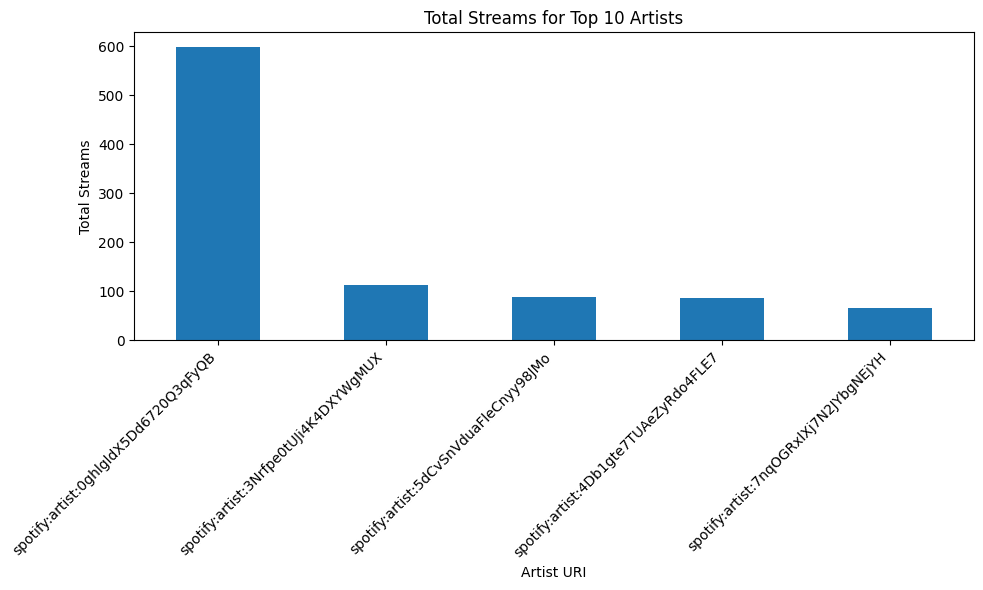

In [17]:
artist_total_streams = df_artists.groupby('artist_uri')['streams'].sum().sort_values(ascending=False)

# Get top 5 artists
top_5_artists = artist_total_streams.index[:5].tolist()

# Save top 5 artist URIs to a file
with open('datasets/top_5_artists.json', 'w') as f:
    json.dump(top_5_artists, f)
    
# Plotting
plt.figure(figsize=(10, 6))
artist_total_streams.head(5).plot(kind='bar')
plt.title('Total Streams for Top 10 Artists')
plt.xlabel('Artist URI')
plt.ylabel('Total Streams')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

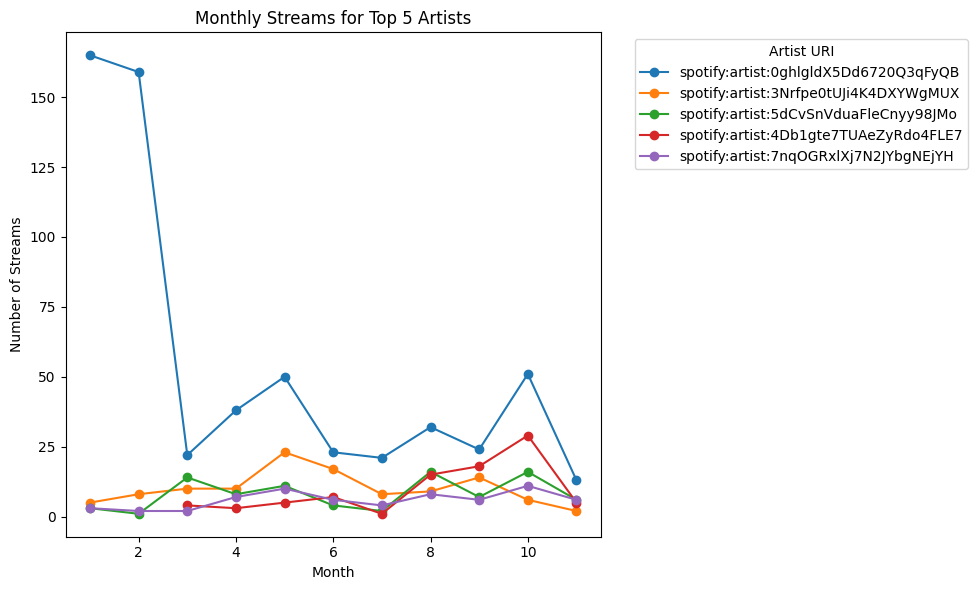

In [20]:
# 2. Line plot of monthly streams for top 5 artists
plt.figure(figsize=(10, 6))
for artist in top_5_artists:
    artist_data = df_artists[df_artists['artist_uri'] == artist].groupby('month')['streams'].sum()
    plt.plot(artist_data.index, artist_data.values, marker='o', label=artist)
plt.title('Monthly Streams for Top 5 Artists')
plt.xlabel('Month')
plt.ylabel('Number of Streams')
plt.legend(title='Artist URI', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

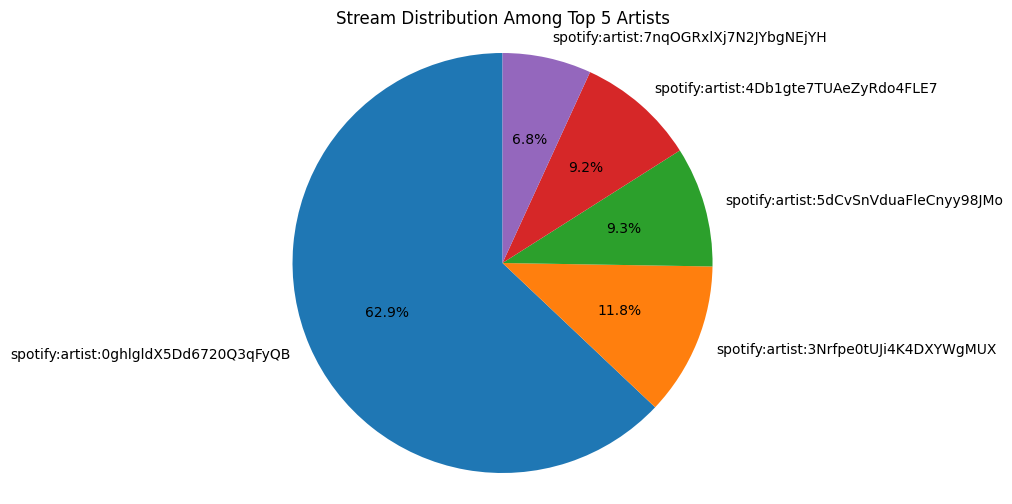

In [21]:
# 5. Pie chart of stream distribution among top 5 artists
plt.figure(figsize=(10, 6))
plt.pie(artist_total_streams.head(), labels=top_5_artists, autopct='%1.1f%%', startangle=90)
plt.title('Stream Distribution Among Top 5 Artists')
plt.axis('equal')
plt.show()

In [22]:
total_listening_time_in_mins = data['topArtists']['topArtistMilliseconds'] / 60000

# Print additional statistics
print("Top 5 Artists by Total Streams:")
for i, (artist, streams) in enumerate(artist_total_streams.head().items(), 1):
    print(f"{i}. {artist}: {streams} streams")
    
print("\nTotal Number of Unique Artists:", data['topArtists']['numUniqueArtists'])
print(f"Total Listening Time for Top Artists: {round(total_listening_time_in_mins)} minutes")
print("Top Artist Fan Percentage:", data['topArtists']['topArtistFanPercentage'])

Top 5 Artists by Total Streams:
1. spotify:artist:0ghlgldX5Dd6720Q3qFyQB: 598 streams
2. spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX: 112 streams
3. spotify:artist:5dCvSnVduaFleCnyy98JMo: 88 streams
4. spotify:artist:4Db1gte7TUAeZyRdo4FLE7: 87 streams
5. spotify:artist:7nqOGRxlXj7N2JYbgNEjYH: 65 streams

Total Number of Unique Artists: 288
Total Listening Time for Top Artists: 1879 minutes
Top Artist Fan Percentage: 0.007968333


In [23]:
for artist in top_5_artists:
    artist_data = df_artists[df_artists['artist_uri'] == artist].groupby('month')['streams'].sum()
    peak_month = artist_data.idxmax()
    peak_streams = artist_data.max()
    print(f"\nPeak month for {artist}: Month {peak_month} with {peak_streams} streams")


Peak month for spotify:artist:0ghlgldX5Dd6720Q3qFyQB: Month 1 with 165 streams

Peak month for spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX: Month 5 with 23 streams

Peak month for spotify:artist:5dCvSnVduaFleCnyy98JMo: Month 8 with 16 streams

Peak month for spotify:artist:4Db1gte7TUAeZyRdo4FLE7: Month 10 with 29 streams

Peak month for spotify:artist:7nqOGRxlXj7N2JYbgNEjYH: Month 10 with 11 streams


# Top Genres, Podcasts, Artists

In [24]:
# Top Genres
print("Top Genres:")
print(", ".join(data['topGenres']['topGenres']))
print(f"Total number of genres: {data['topGenres']['numberGenres']}")

Top Genres:
k-pop, k-pop boy group, v-pop, k-pop girl group, pop
Total number of genres: 5


In [12]:
# Top Podcasts
print("\nTop Podcasts:")
for uri in data['topPodcasts']['topPodcastsUri']:
    print(uri)
print(f"Total podcast listening time: {data['topPodcasts']['totalPodcastMilliseconds'] / 60000:.2f} minutes")
print(f"Podcast listening percentage: {data['topPodcasts']['topPodcastPercentage'] * 100:.2f}%")


Top Podcasts:
Total podcast listening time: 7.19 minutes
Podcast listening percentage: 0.00%


In [26]:
# Top Tracks
top_tracks_uris = data['topTracks']['topTracks']
# Save to a JSON file
with open('datasets/top_tracks_uris.json', 'w') as f:
    json.dump(top_tracks_uris, f)
    
# Print additional statistics
print("\nTop Tracks:")
for uri in top_tracks_uris:
    print(uri)
print(f"Top track play count: {data['topTracks']['topTrackPlayCount']}")
print(f"Distinct tracks played: {data['topTracks']['distinctTracksPlayed']}")
print(f"Top track first played date: {data['topTracks']['topTrackFirstPlayedDate']}")


Top Tracks:
spotify:track:0rhI6gvOeCKA502RdJAbfs
spotify:track:2j1Es5qEl4pD8GEe2WsYgP
spotify:track:0IUksMHKob4SvJJL6QlQVi
spotify:track:6TBJkXHPhu3EsMk1bshwuI
spotify:track:2Xeyoy0TGrSHR0MBI8e4zS
Top track play count: 70
Distinct tracks played: 450
Top track first played date: 2023-01-27


# Yearly Metrics

In [27]:
# Bonus: Yearly Metrics
print("\nYearly Metrics:")
yearly = data['yearlyMetrics']
print(f"Total listening time: {yearly['totalMsListened'] / 3600000:.2f} hours")
print(f"Most listened day: {yearly['mostListenedDay']}")
print(f"Minutes listened on most active day: {yearly['mostListenedDayMinutes']:.2f}")
print(f"Percentile among users: {yearly['percentGreaterThanWorldwideUsers']:.2f}%")


Yearly Metrics:
Total listening time: 119.34 hours
Most listened day: 2023-01-28
Minutes listened on most active day: 300.83
Percentile among users: 62.18%


# That's all for now